In [1]:
#ML_NeuralNetworks

Enter a num:3
6131
Acc: 89.3%
Acc: 93.31%
Acc: 94.28%
Acc: 94.73%
Acc: 95.09%
Enter list of numbers:1


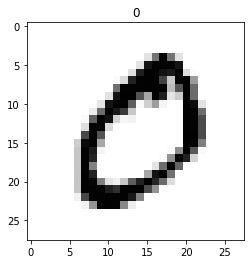

Enter list of numbers:0


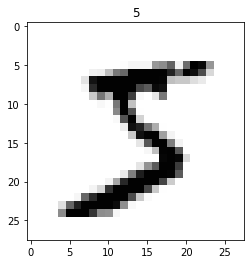

Enter list of numbers:5


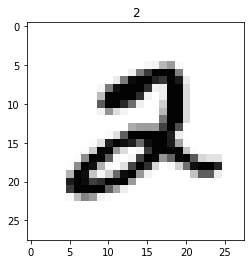

Enter list of numbers:2


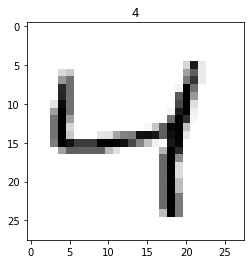

Enter list of numbers:4


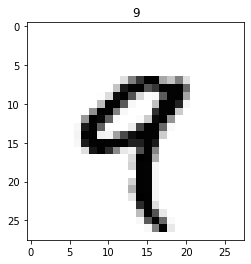

Enter list of numbers:9


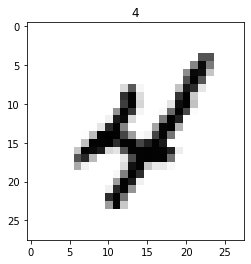

Enter list of numbers:jhb


ValueError: invalid literal for int() with base 10: 'jhb'

In [9]:

import numpy as np
import matplotlib.pyplot as plt


#w = weights, b = bias, i = input, h = hidden, o = output, l = label
#e.g. w_i_h = weights from input layer to hidden layer
def get_mnist():
    with np.load("mnist.npz") as f:
        images, labels = f["x_train"], f["y_train"]
        index3 = int(input("Enter a num:"))
        count_arr = list(f["y_train"] == index3)
        sum0 = 0
        for c in count_arr:
            if c:
                sum0 = sum0 + 1
        print(sum0)
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels

images, labels = get_mnist()
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))

learn_rate = 0.03
nr_correct = 0
epochs = 5
for epoch in range(epochs):
    for img, l in zip(images, labels):
        img = img.reshape(784,1)
        l = l.reshape(10,1)
        
        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ np.transpose(h)
        b_h_o += -learn_rate * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ np.transpose(img)
        b_i_h += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

# Show results
while True:
    
    index2 = input("Enter list of numbers:")
    list1 = index2.split(",")
    for index in list1:
        #index = int(input("Enter a number (0 - 59999): "))
        img = images[int(index)]
        plt.imshow(img.reshape(28, 28), cmap="Greys")

        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
        h = 1 / (1 + np.exp(-h_pre))
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        plt.title(o.argmax())
        plt.show()
